In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

torch.manual_seed(2)

In [2]:
X = torch.Tensor([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = torch.Tensor([0, 1, 1, 0]).view(-1, 1)

In [3]:
class XOR(nn.Module):
    def __init__(self, input_dim=2, output_dim=1):
        super(XOR, self).__init__()
        self.lin1 = nn.Linear(input_dim, 2)
        self.lin2 = nn.Linear(2, output_dim)

    def forward(self, x):
        h1 = self.lin1(x)
        h1 = F.sigmoid(h1)
        y = self.lin2(h1)
        o = F.sigmoid(y)
        return y, h1, o

def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

In [16]:
model = XOR()
weights_init(model)
loss_func = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

epochs = 5001
steps = X.size(0)

for i in range(epochs):
    for j in range(steps):
        data_point = torch.randint(X.size(0), (1,))
        x_var = X[data_point, :].clone()
        y_var = Y[data_point, :].clone()

        y_hat = model(x_var)[0]
        loss = loss_func(y_hat, y_var)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    if i % 500 == 0:
        print("Epoch: {}, Loss: {}".format(i, loss.item()))

Epoch: 0, Loss: 1.5311650037765503
Epoch: 500, Loss: 0.009125548414885998
Epoch: 1000, Loss: 0.0025997909251600504
Epoch: 1500, Loss: 0.0016200524987652898
Epoch: 2000, Loss: 0.0010523025412112474
Epoch: 2500, Loss: 0.0008182753226719797
Epoch: 3000, Loss: 0.001086479052901268
Epoch: 3500, Loss: 0.0006443570018745959
Epoch: 4000, Loss: 0.0008012421894818544
Epoch: 4500, Loss: 0.00047100416850298643
Epoch: 5000, Loss: 0.0006491222884505987


In [17]:
x1 = torch.linspace(-0.2, 1.2, 300)
x2 = torch.linspace(-0.2, 1.2, 300)
[x1, x2] = torch.meshgrid(x1, x2)
Xt = torch.stack((x1.flatten(), x2.flatten())).t()
Xt.shape

torch.Size([90000, 2])

In [18]:
with torch.no_grad():
  _, h1, y = model(Xt)
print(h1.shape)
print(y.shape)

torch.Size([90000, 2])
torch.Size([90000, 1])


In [19]:
h1r = torch.round(h1)
yr = torch.round(y)

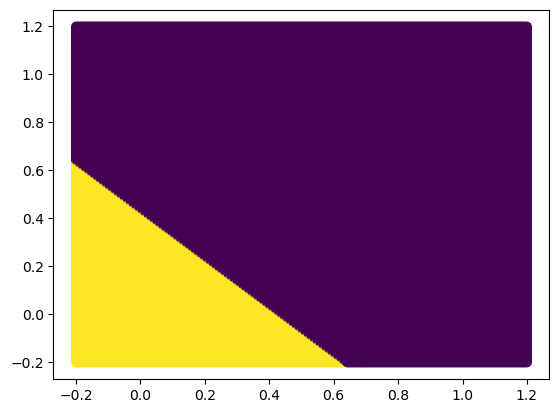

In [20]:
plt.scatter(Xt[:, 0], Xt[:, 1], c=h1r[:, 1])

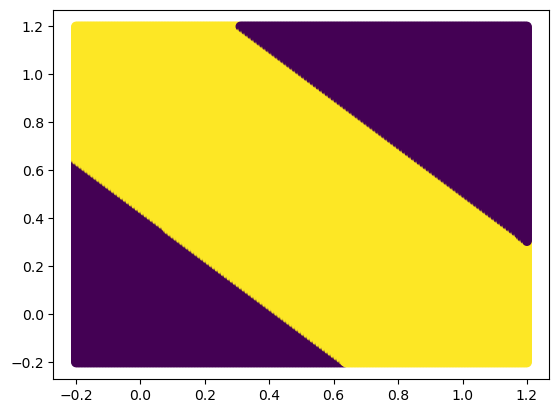

In [21]:
plt.scatter(Xt[:, 0], Xt[:, 1], c=yr[:, 0])

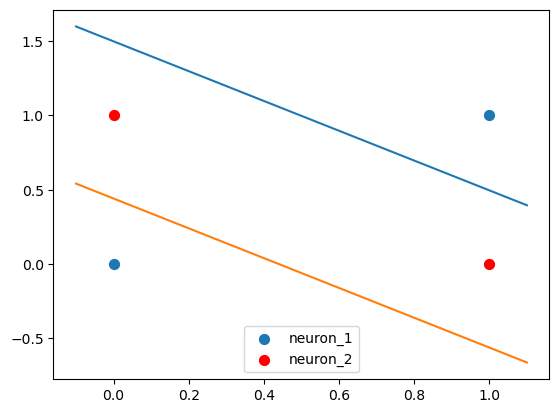

In [22]:
model_params = list(model.parameters())
model_weights = model_params[0].data.numpy()
model_bias = model_params[1].data.numpy()

plt.scatter(X.numpy()[[0,-1], 0], X.numpy()[[0, -1], 1], s=50)
plt.scatter(X.numpy()[[1,2], 0], X.numpy()[[1, 2], 1], c='red', s=50)

x_1 = np.arange(-0.1, 1.1, 0.1)
y_1 = ((x_1 * model_weights[0,0]) + model_bias[0]) / (-model_weights[0,1])
plt.plot(x_1, y_1)

x_2 = np.arange(-0.1, 1.1, 0.1)
y_2 = ((x_2 * model_weights[1,0]) + model_bias[1]) / (-model_weights[1,1])
plt.plot(x_2, y_2)
plt.legend(["neuron_1", "neuron_2"], loc=8)
plt.show()

In [23]:
model.lin1.weight

Parameter containing:
tensor([[-6.7848, -6.7657],
        [-8.2685, -8.2419]], requires_grad=True)

In [24]:
model.lin1.bias

Parameter containing:
tensor([10.1385,  3.6333], requires_grad=True)

In [25]:
model.lin2.weight

Parameter containing:
tensor([[ 16.3038, -16.6952]], requires_grad=True)

In [26]:
model.lin2.bias

Parameter containing:
tensor([-7.8600], requires_grad=True)